In [1]:
import quandl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
import statsmodels.api as sm

In [5]:
dolar = quandl.get('BCB/1', start_date = '2010-01-01')

In [6]:
dolar.head()

,Value
Date,
2010-01-04,1.7240
2010-01-05,1.7227
2010-01-06,1.7337
2010-01-07,1.7413
2010-01-08,1.7390


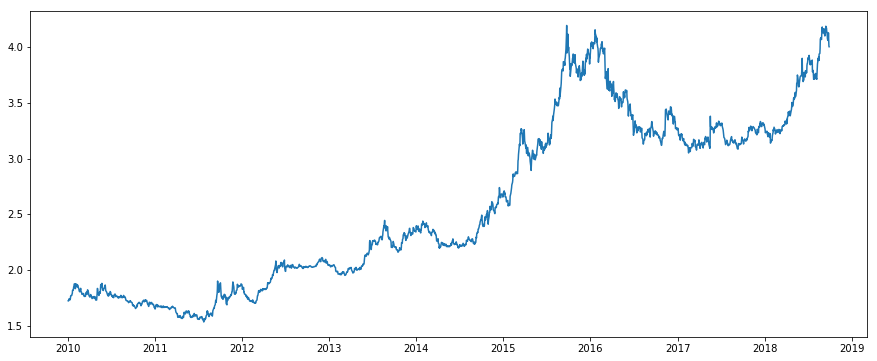

In [7]:
plt.plot(dolar)
plt.show()

In [8]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [10]:
len(dolar)

2197

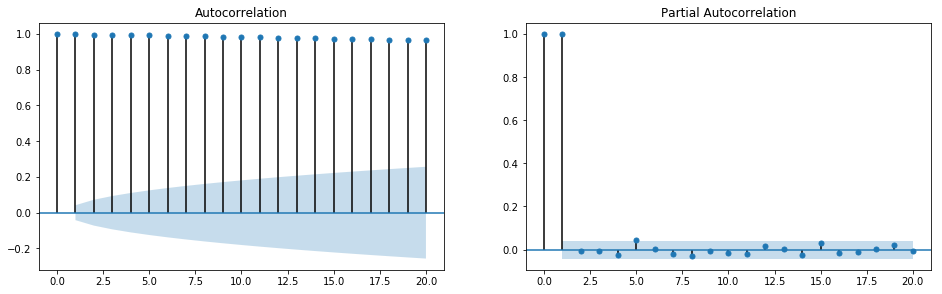

In [9]:
qtd_lag = 20
acf_pacf(dolar, qtd_lag)

### Série de Retorno

$$
r_t = \log \left( \frac{x_t}{x_{t-1}} \right)
$$

In [11]:
rt = np.log(dolar.shift()/dolar) * 100

In [12]:
rt = rt.dropna(inplace=None)

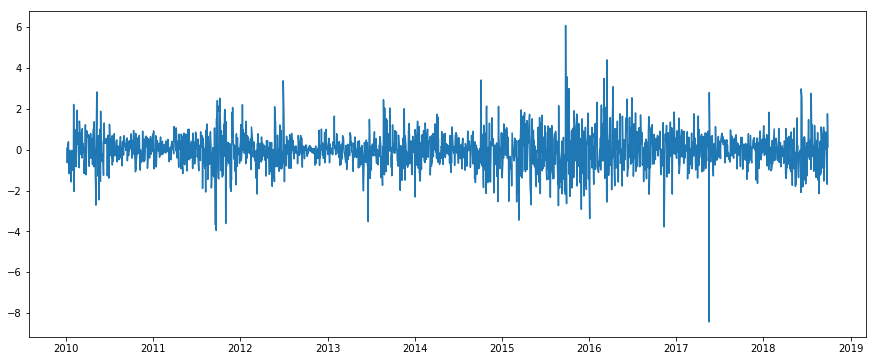

In [13]:
plt.plot(rt)
plt.show()

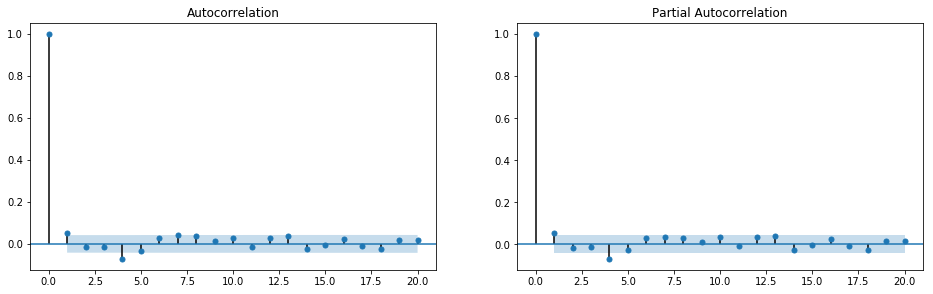

In [14]:
qtd_lag = 20
acf_pacf(rt, qtd_lag)

#### Modelando o retorno por ARIMA

In [15]:
tam_treinamento = int(len(rt) * 0.75)
dados_treinamento, dados_teste = rt.iloc[0:tam_treinamento].values, rt.iloc[tam_treinamento:].values

In [16]:
p = 1
d = 0
q = 1
modelo_arima = ARIMA(dados_treinamento, order=(p,d,q)).fit()

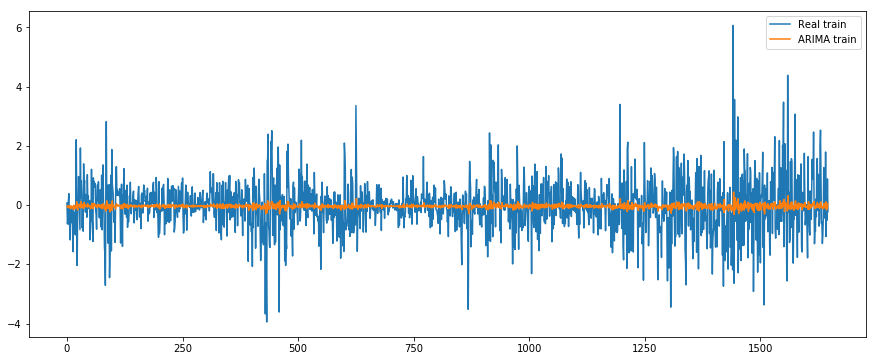

In [17]:
plt.plot(dados_treinamento, label='Real train')
plt.plot(modelo_arima.fittedvalues, label = 'ARIMA train')
plt.legend(loc='best')
plt.show()

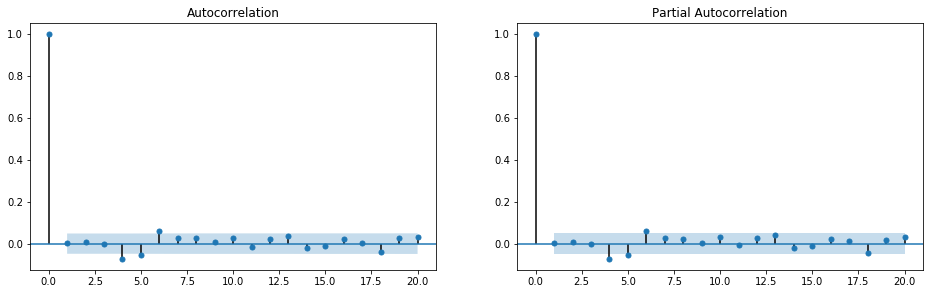

In [18]:
qtd_lag = 20
acf_pacf(modelo_arima.resid, qtd_lag)

### Utilizando o GARCH

In [19]:
from arch import arch_model

In [20]:
p = 1 
q = 1

garch = arch_model(dados_treinamento, vol='GARCH', p=p, q=q).fit( disp='off')

In [21]:
garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -1902.84
Distribution:                  Normal   AIC:                           3813.67
Method:            Maximum Likelihood   BIC:                           3835.30
                                        No. Observations:                 1647
Date:                Mon, Oct 01 2018   Df Residuals:                     1643
Time:                        16:02:28   Df Model:                            4
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.9831e-03  1.701e-02     -0.117      0.907 [-3.532e-02,3.136e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.0238e-03  2.992e-03      2.013  4.409e-02 [1.594e-04,1.189e-02]
alpha[1]       0.0998  2.011e-02      4.964  6.902e-07   [6.042e-02,  0.139]
beta[1]        0.8991  1.754e-02     51.253      0.000     [  0.865,  0.934]
============================================================================

Covariance estimator: robust
"""

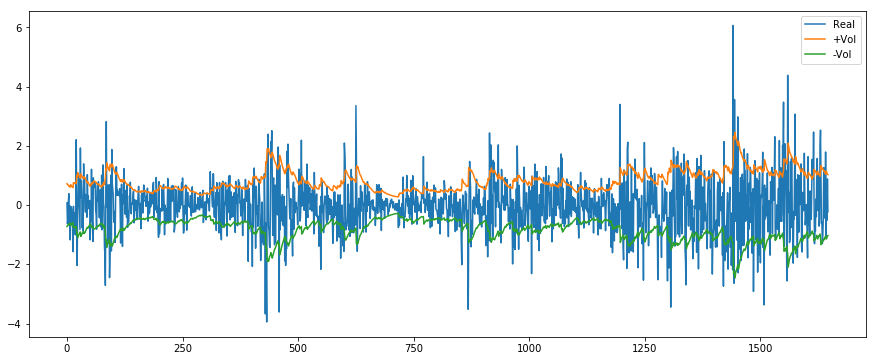

In [22]:
plt.plot(dados_treinamento, label='Real')
plt.plot(garch._volatility, label = '+Vol')
plt.plot(- garch._volatility, label = '-Vol')


plt.legend(loc='best')
plt.show()

In [ ]:
garch.